# **SONG RECOMMENDER**

### MARIA KOILALOU - JUSTINE LE BOURGE 

**GROUP 11**

Project for Artificial Intelligence [EARIN] Summer 2023

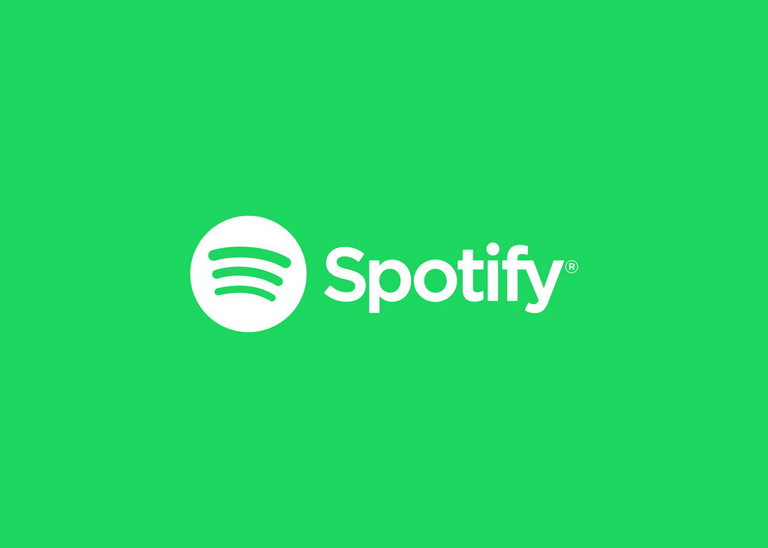

## **PROBLEM DEFINITION**

Our project aims to develop a sophisticated Song Recommender System using Spotify datasets. The goal is to create a model that can provide song recommendations to users based on the song's characteristics. By analyzing the information provided by the datasets, we will identify the key attributes that determine whether a user will like a song or not.

In this project we are going to develop a program that uses some Spotify datasets. Spotify is a song streaming app and platform that most people use and almost every artist uploads their songs there. We will start by exploring the Spotify datasets, which contain extensive information on songs, artists, and song characteristics, including popularity data. These datasets will serve as a valuable resource for training our models.

First in our project we are going to examine the datasets. The songs, the artists and the characteristics of the songs and the relationship between them.
Based on the user's input we are going to search for similar song's that he might enjoy.

In our project we are going to use Python Notebooks for a quicker way to examine data.

We import the necessary libraries to start our analysis:

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
alt.renderers.enable('kaggle')
warnings.simplefilter("ignore")

## **Dataset**
## Overview

First we are going to examine the whole dataset and create some graphs and tables with helpful information about the data that we are going to use later.

In [3]:
# Read Dataset
data = pd.read_csv("/kaggle/input/spotifyclassification/data.csv")

In [4]:
# Print the Start of the Dataset to examine the datas
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


We notice that the first column of the Dataset is empty so we fix it not to be unnamed. We also erase 'target' value because we aren't going to use it for our analysis. The model is going to use unsupervised learning techniques so it won;t need a 'target' variable.

In [5]:
# Fix Unnamed column's name
data = data.drop("Unnamed: 0", axis="columns")
# Drop unnecessary 'target' column
data.drop('target', axis=1, inplace=True)

In [6]:
# Drop duplicate values
data = data.drop_duplicates()

In [7]:
# Check for null values in the DataFrame
data.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
dtype: int64

In [8]:
# Print the type of every attribute of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2016
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2009 non-null   float64
 1   danceability      2009 non-null   float64
 2   duration_ms       2009 non-null   int64  
 3   energy            2009 non-null   float64
 4   instrumentalness  2009 non-null   float64
 5   key               2009 non-null   int64  
 6   liveness          2009 non-null   float64
 7   loudness          2009 non-null   float64
 8   mode              2009 non-null   int64  
 9   speechiness       2009 non-null   float64
 10  tempo             2009 non-null   float64
 11  time_signature    2009 non-null   float64
 12  valence           2009 non-null   float64
 13  song_title        2009 non-null   object 
 14  artist            2009 non-null   object 
dtypes: float64(10), int64(3), object(2)
memory usage: 251.1+ KB


We check some basic information about the attribute’s values such as total count, mean, minimum and maximum value:

In [9]:
# Basic description of the dataset
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2009.000000,2009.000000,2.009000e+03,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,0.187710,0.618218,2.461865e+05,0.682004,0.133167,5.347437,0.190681,-7.074358,0.612743,0.092257,121.614624,3.968143,0.497320
std,0.259829,0.160989,8.201738e+04,0.210281,0.273127,3.649312,0.155387,3.758714,0.487245,0.089033,26.678969,0.256355,0.247118
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800
25%,0.009470,0.514000,1.999730e+05,0.564000,0.000000,2.000000,0.092200,-8.390000,0.000000,0.037500,100.189000,4.000000,0.296000
50%,0.063700,0.631000,2.290930e+05,0.716000,0.000075,6.000000,0.126000,-6.246000,1.000000,0.054900,121.427000,4.000000,0.493000
75%,0.265000,0.738000,2.698670e+05,0.846000,0.054000,9.000000,0.246000,-4.741000,1.000000,0.108000,137.644000,4.000000,0.692000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000


In [10]:
# Print the size of the Dataset 
data.shape

(2009, 15)

We start to examine the **artists** that are included in our dataset

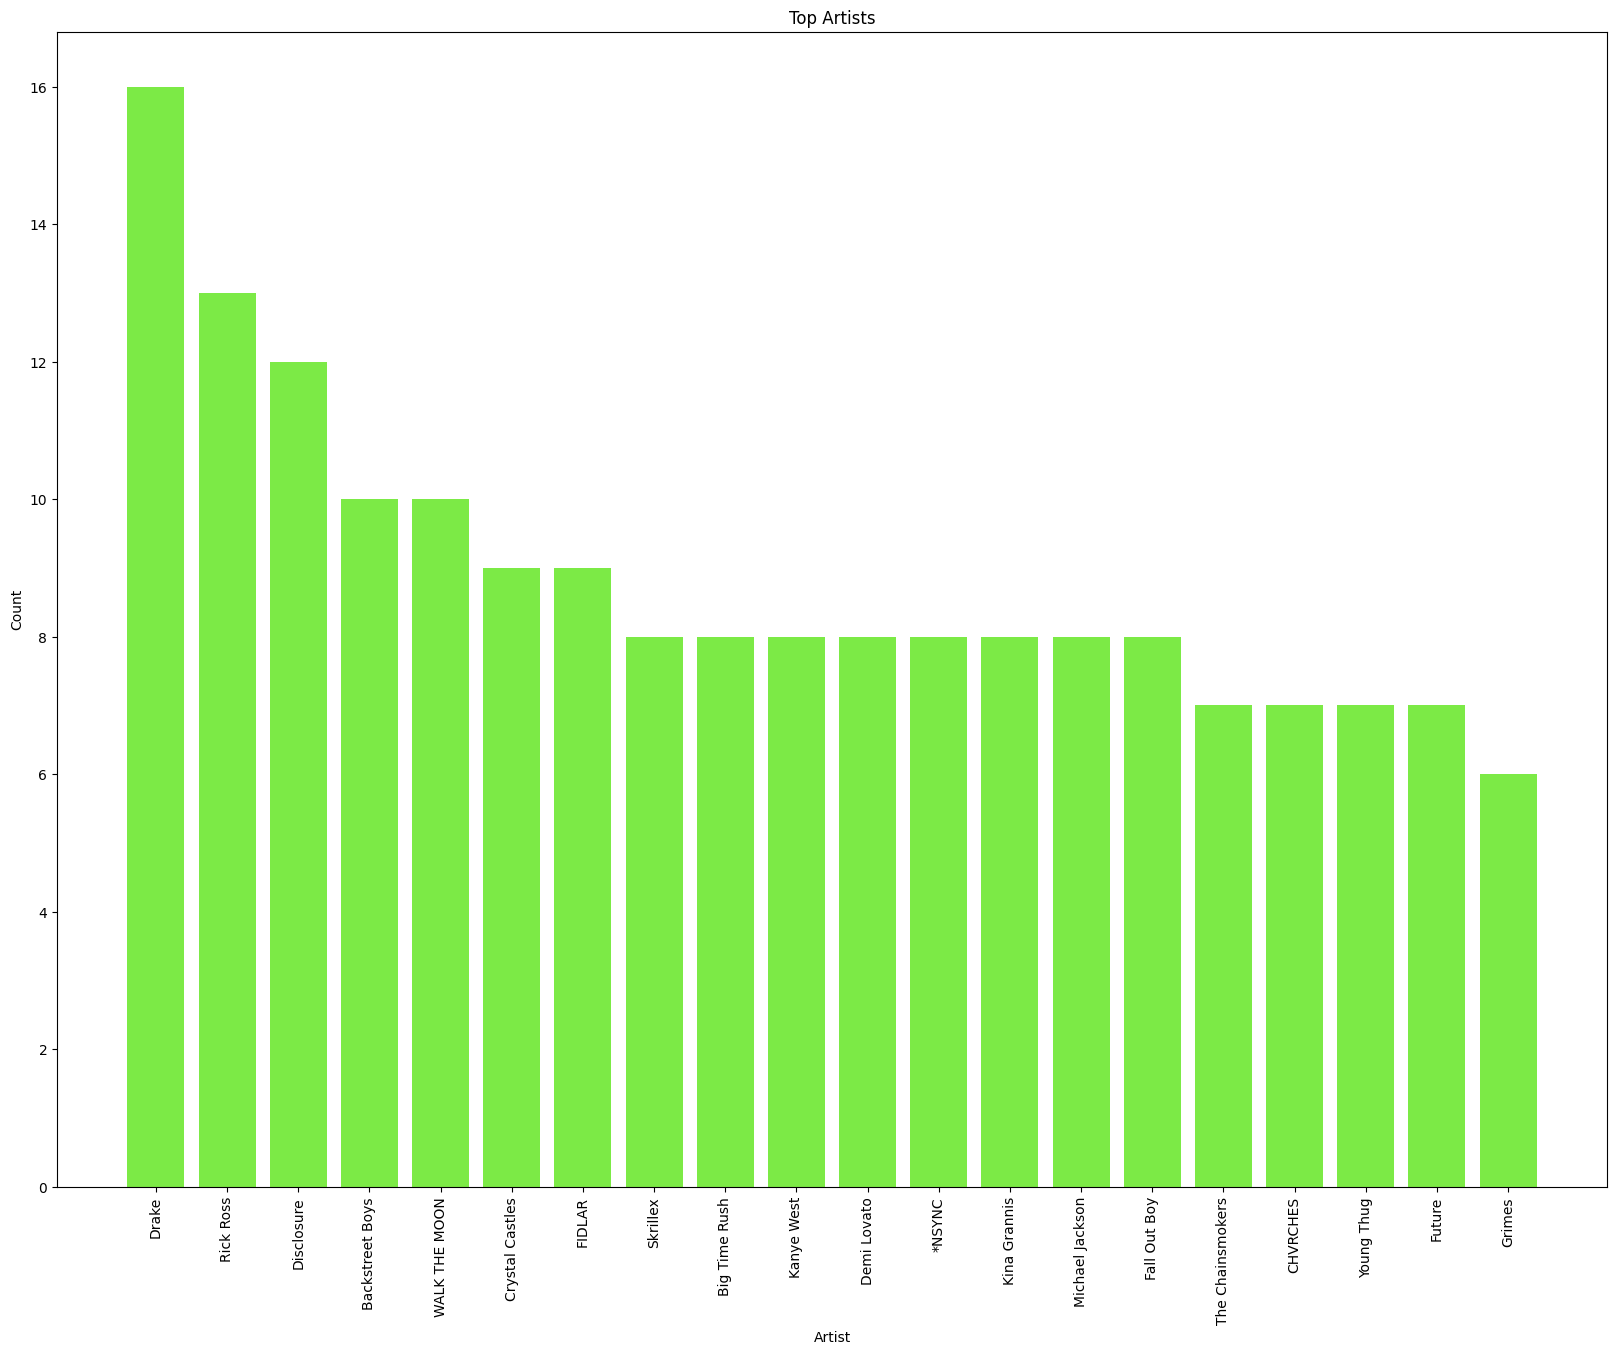

In [11]:
# Set the title and axis labels
values = data['artist'].value_counts().tolist()[:20]
names = list(dict(data['artist'].value_counts()).keys())[:20]

# Create the bar plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.bar(names, values, color="#7CEA46")

# Set the title and axis labels
ax.set_title("Top Artists")
ax.set_xlabel("Artist")
ax.set_ylabel("Count")

# Display the plot
plt.xticks(rotation=90)
plt.show()

We print the **Correlation Matrix** of the dataset to find the correlation between the attributes. The ones with the higher correlation are the ones that we need to check because they will probably be important for the analysis.

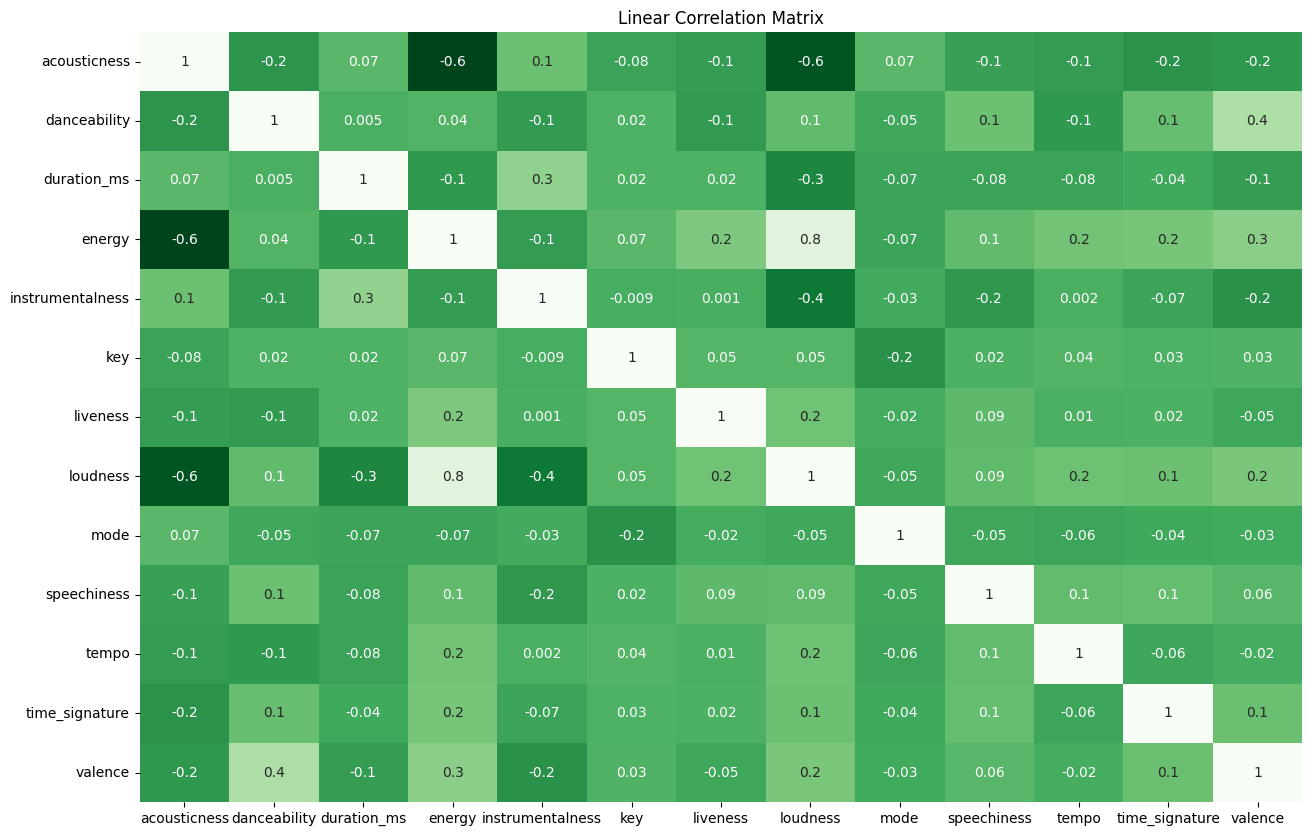

In [12]:
# Plot linear correlation matrix
numeric_data = data.drop(['song_title', 'artist'], axis=1)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)
plt.title('Linear Correlation Matrix')
plt.show()

In [13]:
# Check absolute correlation
corr_df = data.corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))))

alt.Chart(...)

In [14]:
# Numeric Data
numeric_data = data.select_dtypes(include=[np.number])

numeric_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [15]:
#Categorical Data
categorical_data = data.select_dtypes(include=[np.object])

categorical_data.columns

Index(['song_title', 'artist'], dtype='object')

We use **heatmap** to review the correlation more clearly. We notice that there are some pairs that have larger absolute correlation than most of the others such as : 
* *loudness* and *energy*, 
* *acousticness* and *energy*, 
* *valence* and *danceability*

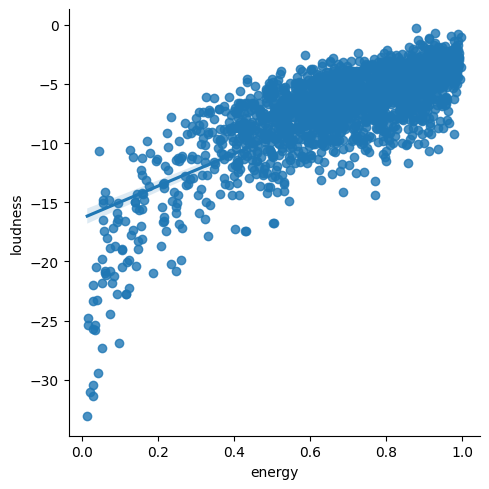

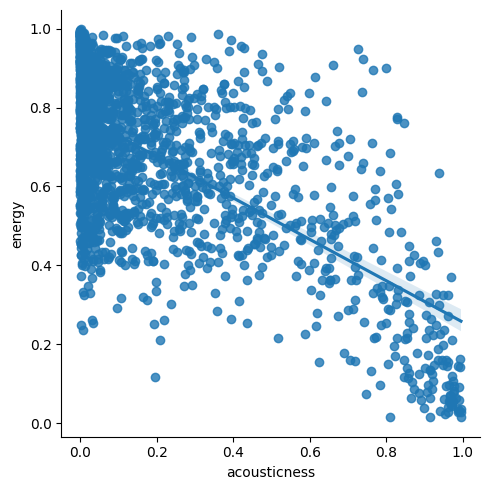

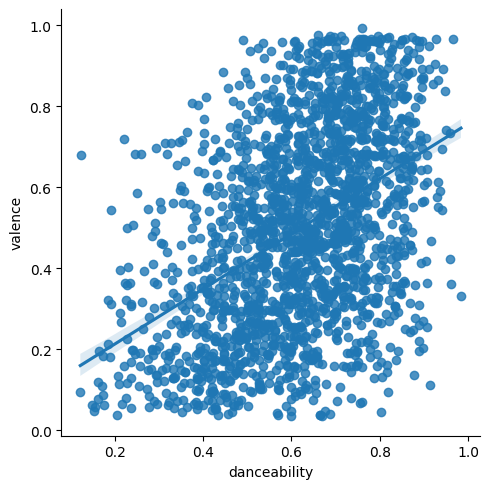

In [16]:
# Scatter chart for "loudness" and "energy"
sns.lmplot(y='loudness', x='energy', data=data, palette='BuGn')

# Scatter chart for "acousticness" and "energy"
sns.lmplot(y='energy', x='acousticness', data=data, palette='BuGn')

# Scatter chart for "valence" and "danceability"
sns.lmplot(y='valence', x='danceability', data=data, palette='BuGn')

We notice that *valence* and *danceability* don't seem to have such a strong correlation so we don't create new attributes for them

In [17]:
# Create new attributes
data['energy_loudness_ratio'] = data['energy'] / data['loudness']
data['energy_acousticness_ratio'] = data['energy'] / data['acousticness']
# Append the new features to numeric_data
numeric_data = pd.concat([numeric_data, data[['energy_loudness_ratio', 'energy_acousticness_ratio']]], axis=1)

We print **Histograms** for all the numeric columns to check the values of each attribute

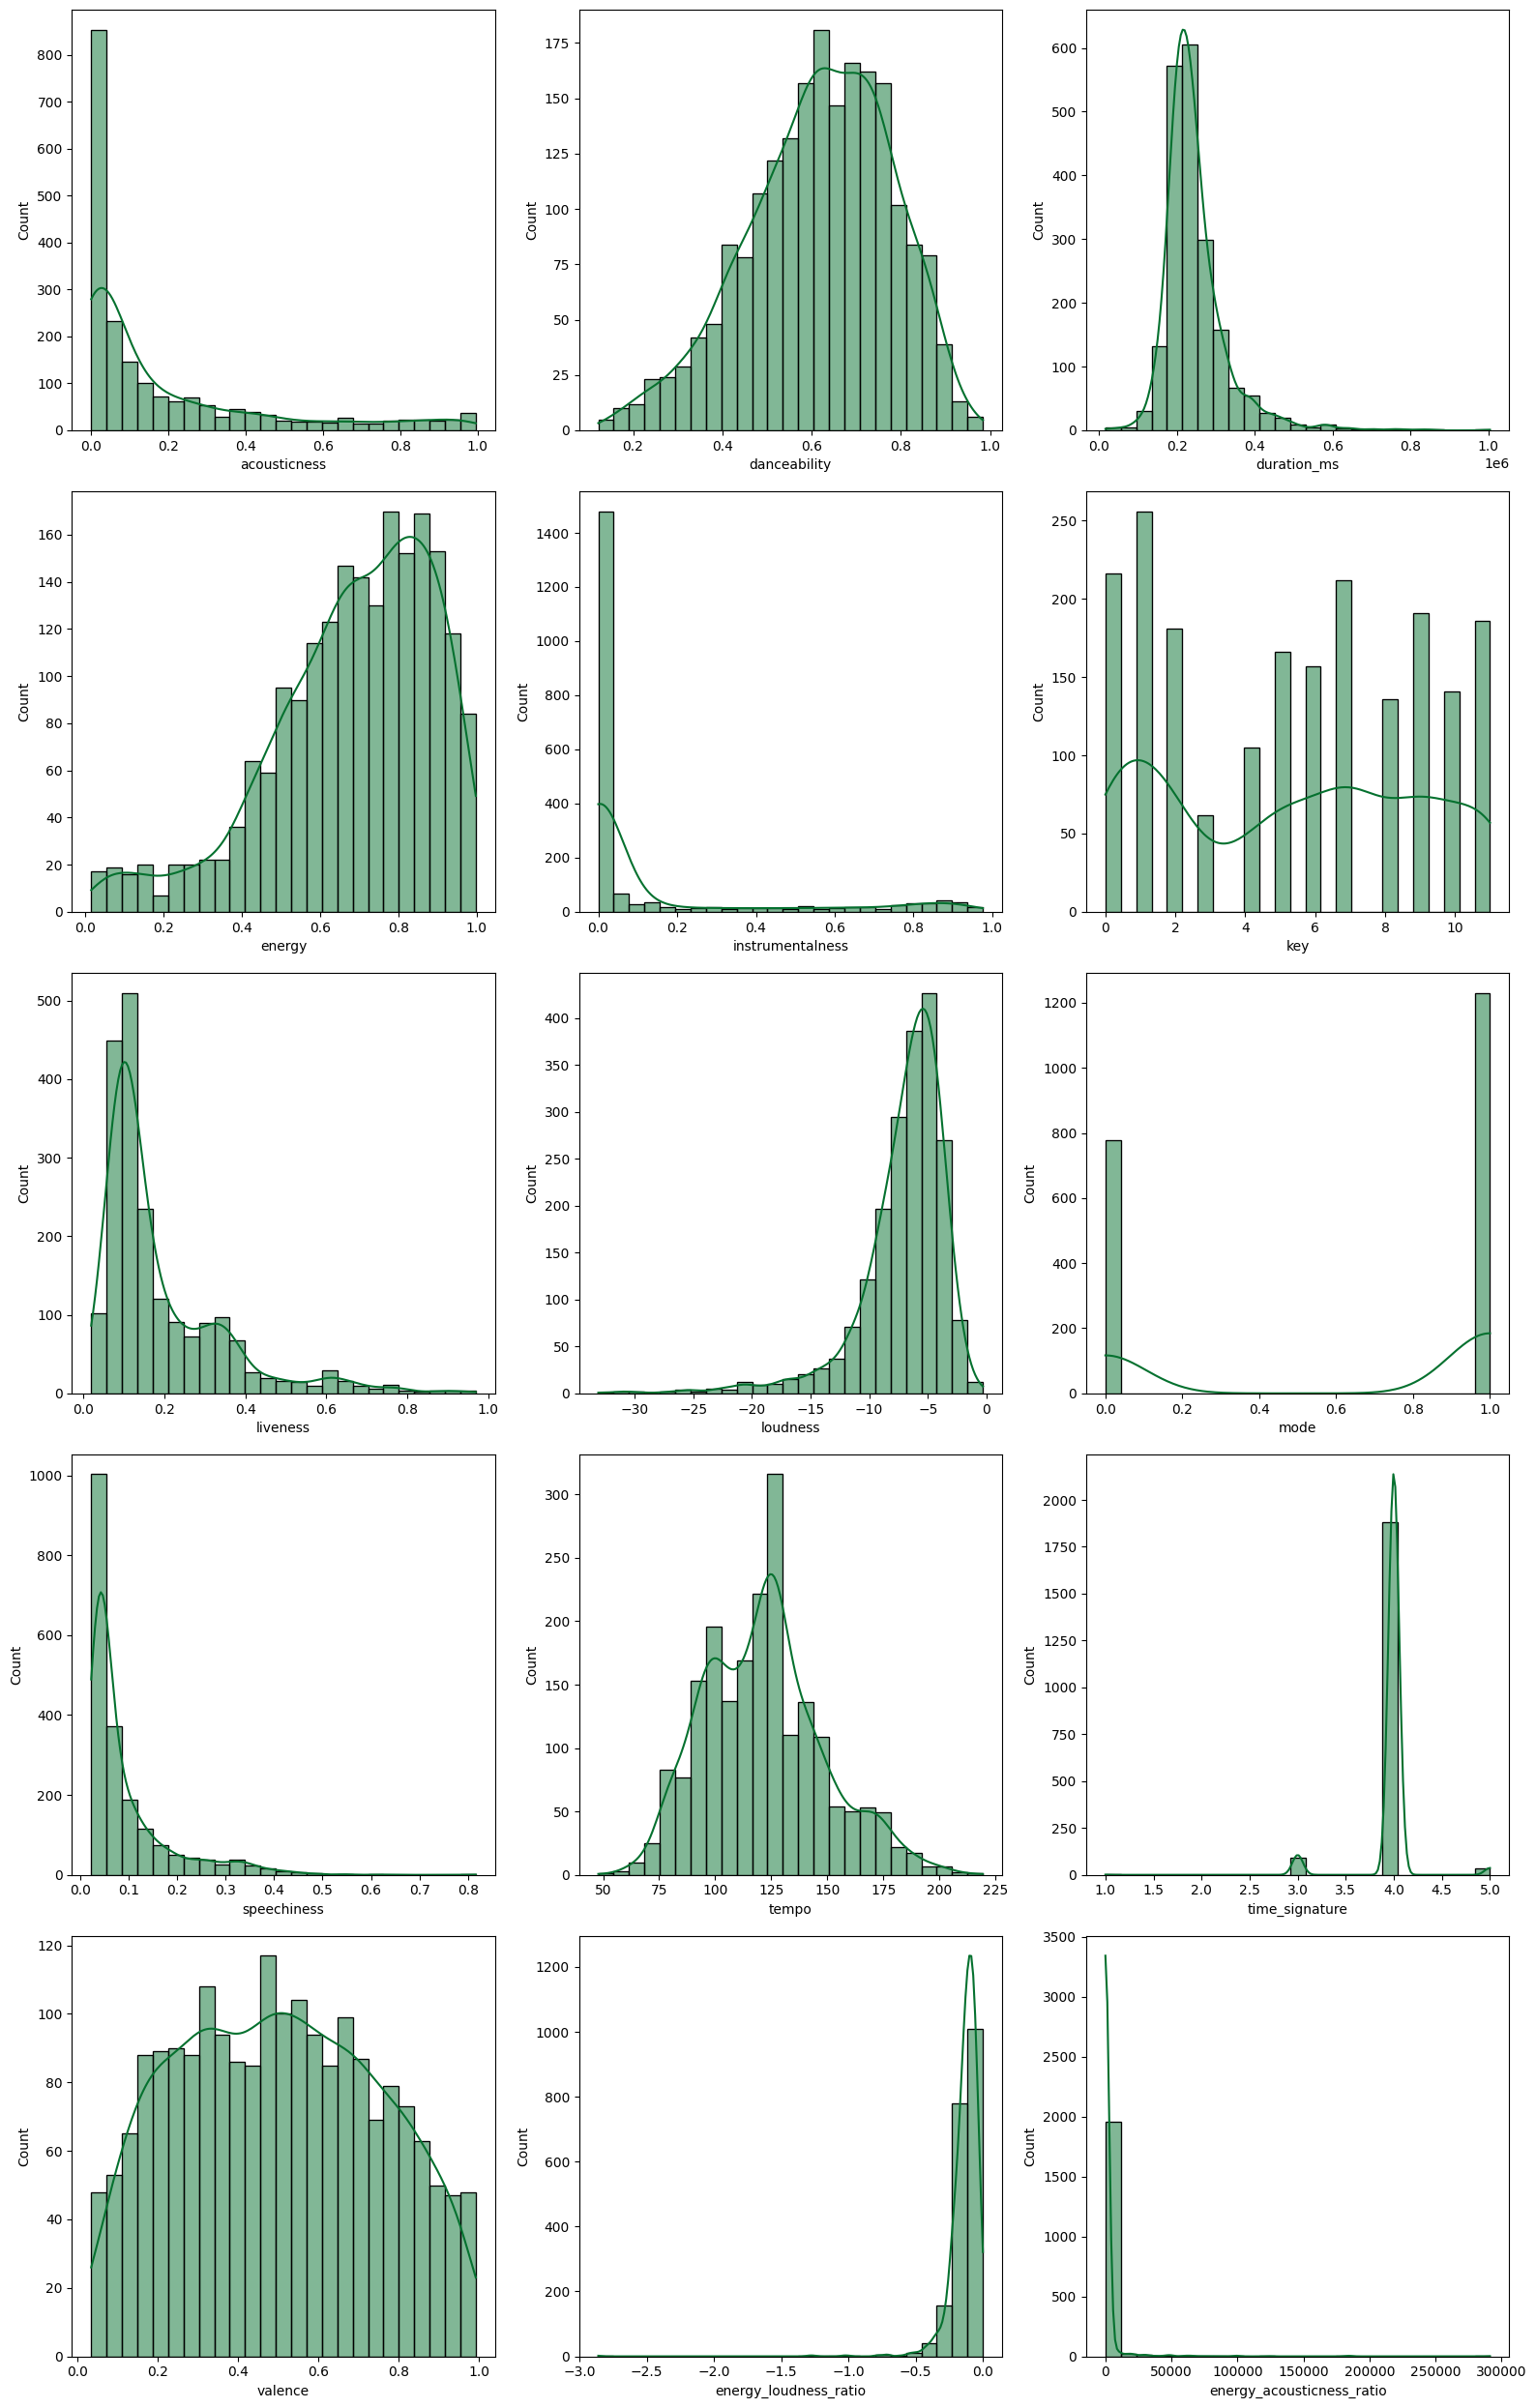

In [18]:
sns.set_palette("Greens_r")
num_cols = data.select_dtypes(include="number").columns
fig, axes = plt.subplots(5, 3, figsize=(16, 25))
axes = axes.flatten()
ax_no = 0
for col in num_cols:
    sns.histplot(data=data, x=col, bins=25, kde=True, ax=axes[ax_no])
    ax_no += 1
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

## Pre-processing

We clean the data so we feed only the important variables on the model

We notice that some attributes such as *mode*, *time_signature* and *energy_acousticness_ratio* don't have different values between the different songs on the dataset so they are not defined characteristics that we need for our analysis.

In [19]:
data.drop('mode', axis=1, inplace=True)
data.drop('time_signature', axis=1, inplace=True)
data.drop('energy_acousticness_ratio', axis=1, inplace=True)

In [20]:
# Continuous Columns
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'tempo', 'valence', 'speechiness', 'instrumentalness','energy_loudness_ratio']

In [21]:
# Discrete Columns
discrete_cols = ['key']

We scale the continuous data of the dataset

In [22]:
# Create a StandardScaler object
scaler = StandardScaler()
# Apply scaling to the numeric features
scaled_features = scaler.fit_transform(numeric_data[continuous_cols])

# Create a new DataFrame with the scaled numeric features
data[continuous_cols] = pd.DataFrame(scaled_features, columns=data[continuous_cols].columns)

We perform One-Hot Encoding for the discrete data in our dataset.

In [23]:
# Perform one-hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns=discrete_cols, drop_first=True)
data = pd.concat([data.drop(columns=discrete_cols), one_hot_encoded_data], axis=1)

# Check for duplicate columns
duplicate_columns = data.columns[data.columns.duplicated()]

# Drop duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

data = data.dropna()

# Numeric Data
numeric_data = data.select_dtypes(include=[np.number])

numeric_data.columns

# Print the DataFrame after dropping duplicate columns
print(data)

      acousticness  danceability  duration_ms    energy  instrumentalness  \
0        -0.683353      1.334474    -0.507172 -1.179686         -0.407484   
1         0.043461      0.775291     0.984749 -1.536441         -0.465311   
2        -0.590191      1.365539    -0.737583 -1.284334         -0.486830   
3         1.602569     -0.771781    -0.570430 -1.636332          1.380040   
4        -0.029682      0.371437     1.789169 -0.575581          1.387364   
...            ...           ...          ...       ...               ...   
2004     -0.718538     -0.212598     0.344128  1.189166         -0.477835   
2005     -0.385005      1.713475    -0.780572  0.998897         -0.481571   
2006     -0.689627      0.116698    -0.475463  1.203436         -0.473074   
2007     -0.716306     -0.380353    -0.738888  1.474570          1.991629   
2008     -0.711801     -1.070011    -0.508147  1.108301         -0.487545   

      liveness  loudness  speechiness     tempo   valence  ... key_2 key_3 

We print the attributes with the highest explained variance in descending order so we figure the importance of each attribute inside a dataset.

In [24]:
n_components = 15  # Number of components to keep

pca = PCA(n_components=n_components)
pca.fit(numeric_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Get the indices of the components with the highest explained variance in descending order
top_components_indices = np.argsort(explained_variance_ratio)[::-1][:n_components]

# Get the corresponding column names
sorted_attributes_pca = [numeric_data.columns[i] for i in top_components_indices]

# Create a DataFrame with the sorted attributes from PCA
final_attributes_pca = pd.DataFrame({'Attributes': sorted_attributes_pca})

# Print the final DataFrame
print(final_attributes_pca)

               Attributes
0            acousticness
1            danceability
2             duration_ms
3                  energy
4        instrumentalness
5                liveness
6                loudness
7             speechiness
8                   tempo
9                 valence
10  energy_loudness_ratio
11                  key_1
12                  key_2
13                  key_3
14                  key_4


We keep the 10 most important attributes of the dataset:

In [25]:
# Get the top 10 attributes from PCA
pca_top_attributes = sorted_attributes_pca[:10]

# Get the 8 attributes with the highest importance based on their position in the combined list
final_attributes = pca_top_attributes[:10]

# Print the final attributes
for attribute in final_attributes:
    print(attribute)

acousticness
danceability
duration_ms
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence


We create the new data frame with only the most important attributes:

In [26]:
# Select the relevant columns from numeric_data
pca_data = numeric_data[final_attributes]

# Add the 'artist' and 'song_title' columns from the data DataFrame
pca_data.insert(0, 'song_title', data['song_title'])
pca_data.insert(1, 'artist', data['artist'])

new_data = pca_data.dropna()
new_data.head()

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Mask Off,Future,-0.683353,1.334474,-0.507172,-1.179686,-0.407484,-0.165313,-0.457888,3.805626,1.066550,-0.855352
1,Redbone,Childish Gambino,0.043461,0.775291,0.984749,-1.536441,-0.465311,-0.345553,-0.885268,-0.144439,1.442258,0.367042
2,Xanny Family,Future,-0.590191,1.365539,-0.737583,-1.284334,-0.486830,-0.203936,-0.019597,2.210321,-1.746028,-1.312737
3,Master Of None,Beach House,1.602569,-0.771781,-0.570430,-1.636332,1.380040,-0.633936,-2.171933,-0.743240,-1.317719,-1.082021
4,Parallel Lines,Junior Boys,-0.029682,0.371437,1.789169,-0.575581,1.387364,1.598462,-1.217113,-0.256784,1.964185,1.646103


We perform PCA dimensional reduction to the attributes:

In [27]:
# Perform PCA for dimensional reduction
n_components = 4  # Number of components to keep
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(new_data.iloc[:, 2:])  # Exclude 'song_title' and 'artist' columns

# Convert the reduced_data back to a DataFrame
reduced_data_pca = pd.DataFrame(reduced_data)
reduced_data_pca.insert(0, 'song_title', pca_data['song_title'])
reduced_data_pca.insert(1, 'artist', pca_data['artist'])

reduced_data_pca.head()

,song_title,artist,0,1,2,3
0,Mask Off,Future,-0.377790,-0.819423,-1.488999,3.634478
1,Redbone,Childish Gambino,1.002715,-0.800291,0.004221,0.750283
2,Xanny Family,Future,0.146192,-1.381900,-0.793918,1.506959
3,Master Of None,Beach House,3.699711,-0.155546,-0.462886,-0.727139
4,Parallel Lines,Junior Boys,0.758668,0.413775,1.910776,1.613494


We perform t-SNA for dimensional reduction:

In [28]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(reduced_data_pca.iloc[:, 2:])  # Exclude 'song_title' and 'artist' columns

# Convert the reduced_data_tsne back to a DataFrame
reduced_data_tsne = pd.DataFrame(reduced_data_tsne, columns=['TSNE1', 'TSNE2'])
reduced_data_tsne.insert(0, 'song_title', reduced_data_pca['song_title'])
reduced_data_tsne.insert(1, 'artist', reduced_data_pca['artist'])
reduced_data_tsne.dropna()
print(reduced_data_tsne)

                                   song_title            artist      TSNE1  \
0                                    Mask Off            Future -53.655155   
1                                     Redbone  Childish Gambino   7.646688   
2                                Xanny Family            Future -47.584518   
3                              Master Of None       Beach House  44.599388   
4                              Parallel Lines       Junior Boys  23.114576   
...                                       ...               ...        ...   
1996                    Quit You - Wuki Remix        Lost Kings -40.959396   
1997         Don't Let Me Down - Zomboy Remix  The Chainsmokers -12.989816   
1998                    Faded - Slushii Remix       Alan Walker -22.390383   
1999  Can't Get Enough - Pegboard Nerds Remix   Tommie Sunshine -23.952099   
2000                     Light - Loosid Remix          San Holo -18.279173   

          TSNE2  
0      0.741374  
1    -20.658545  
2     -9.

## **Technical Approach**
## Architecture

K-means is a clustering algorithm that aims to partition data points into a specified number of clusters (k) based on their similarity. It operates by iteratively assigning data points to the nearest centroid and updating the centroids based on the mean of the assigned points. This process continues until convergence is reached, resulting in k clusters with the centroids representing the cluster centers.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another clustering algorithm that groups together data points based on their density. It defines clusters as areas of high-density separated by areas of low-density. DBSCAN requires two parameters: epsilon (eps), which specifies the radius of the neighborhood around a data point, and min_samples, which determines the minimum number of data points within the epsilon radius to form a dense region.

Both K-means and DBSCAN have their advantages and limitations. K-means is a centroid-based algorithm that works well when the clusters have a spherical shape and are of similar size. It is sensitive to the initial placement of centroids and may converge to suboptimal solutions. DBSCAN, on the other hand, is density-based and can discover clusters of arbitrary shapes. It is robust to noise and can handle clusters of different sizes. However, it requires tuning of parameters and may struggle with high-dimensional data.

## Training details

In [29]:
# The user gives a song input as preference
user_input = input("Enter a song title: ")

Enter a song title:  Mask Off


In [30]:
# Function to calculate similarity between songs within the same cluster
def calculate_similarity(cluster_id):
    cluster_data = reduced_data_tsne[reduced_data_tsne['cluster_label'] == cluster_id]
    similarity_scores = np.zeros(len(cluster_data))

    for i, song in enumerate(cluster_data.iterrows()):
        song_features = song[1][2:]  # Exclude 'song_title', 'artist', and 'cluster_label' columns
        similarity_scores[i] = cosine_similarity([song_features], [cluster_data.iloc[i, 2:]])[0][0]

    # Sort songs in descending order of similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]
    similarity_scores = similarity_scores[sorted_indices]

    return similarity_scores, sorted_indices

### K-Means Algorithm

In [72]:
# Perform clustering using KMeans algorithm
n_clusters = 15  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(reduced_data_tsne.iloc[:, 2:].values)

# Add the cluster labels as a new column in the reduced_data DataFrame
reduced_data_tsne['cluster_label'] = cluster_labels_kmeans

# Function to recommend similar songs based on user input
def recommend_similar_songs_kmeans(user_input_title):
    # Find the cluster label of the user input song
    user_song_cluster = reduced_data_tsne.loc[reduced_data_tsne['song_title'] == user_input_title, 'cluster_label'].values[0]

    # Get the songs within the user song's cluster
    cluster_songs = reduced_data_tsne[reduced_data_tsne['cluster_label'] == user_song_cluster]

    # Calculate similarity within the user song's cluster
    similarity_scores, sorted_indices = calculate_similarity(user_song_cluster)

    # Exclude the user input song from the recommendations
    sorted_indices = sorted_indices[sorted_indices != 0][:10]

    # Get the most similar songs within the user song's cluster
    similar_songs = cluster_songs.iloc[sorted_indices]

    # Sort the similar songs based on similarity scores
    similar_songs = similar_songs.assign(similarity=similarity_scores[sorted_indices])
    similar_songs = similar_songs.sort_values('similarity', ascending=False)
    similar_songs.dropna()
    return similar_songs[['song_title', 'artist']]

# Example usage
recommended_songs_kmeans = recommend_similar_songs_kmeans(user_input)
print(recommended_songs_kmeans)

                       song_title             artist
201                         Mercy         Kanye West
195                  GodLovesUgly         Atmosphere
267                           NaN                NaN
287   I Want You - Single Version        Marvin Gaye
618              Oh My - Club Mix     The Partysquad
1394                  Love, Love.          Big Brain
1420          Idols Become Rivals          Rick Ross
1397               귀가 Return Home  카우칩스 The CowChips
1395                 I Don't Want            Jungkey
1180               Still Got Time               ZAYN


### *Evaluation*

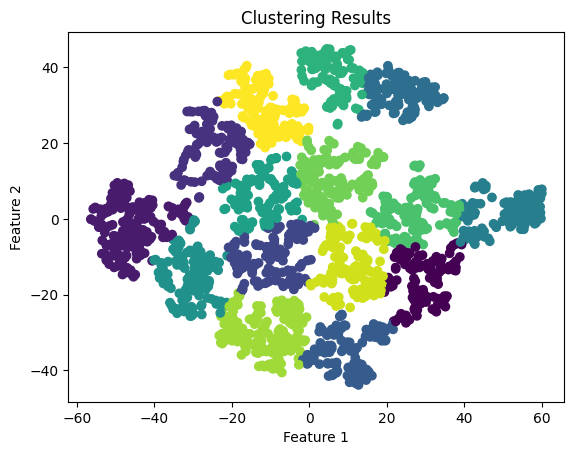

In [32]:
# Plot the clustering results
plt.scatter(reduced_data_tsne.iloc[:, 2], reduced_data_tsne.iloc[:, 3], c=cluster_labels_kmeans, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

In [36]:
# Calculate the Calinski-Harabasz index
ch_score_kmeans = calinski_harabasz_score(reduced_data_tsne.iloc[:, -3:-1], cluster_labels_kmeans)

print("Calinski-Harabasz Index:", ch_score_kmeans)

Calinski-Harabasz Index: 2578.3924728283146


In [37]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_data_tsne.iloc[:, -3:-1], cluster_labels_kmeans)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.42274478


### DBSCAN Clustering

In [67]:
# DBSCAN clustering
eps = 0.8 # Radius of the neighborhood
min_samples = 15  # Minimum number of samples in a neighborhood to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels_dbscan = kmeans.fit_predict(reduced_data_tsne.iloc[:, 2:].values)

# Add the cluster labels as a new column in the reduced_data DataFrame
reduced_data_tsne['cluster_label'] = cluster_labels_dbscan

# Function to recommend similar songs based on user input
def recommend_similar_songs_dbscan(user_input_title):
    # Find the cluster label of the user input song
    user_song_cluster = reduced_data_tsne.loc[reduced_data_tsne['song_title'] == user_input_title, 'cluster_label'].values[0]

    # Get the songs within the user song's cluster
    cluster_songs = reduced_data_tsne[reduced_data_tsne['cluster_label'] == user_song_cluster]

    # Calculate similarity within the user song's cluster
    similarity_scores, sorted_indices = calculate_similarity(user_song_cluster)

    # Exclude the user input song from the recommendations
    sorted_indices = sorted_indices[sorted_indices != 0][:10]

    # Get the most similar songs within the user song's cluster
    similar_songs = cluster_songs.iloc[sorted_indices]

    # Sort the similar songs based on similarity scores
    similar_songs = similar_songs.assign(similarity=similarity_scores[sorted_indices])
    similar_songs = similar_songs.sort_values('similarity', ascending=False)
    similar_songs.dropna()
    return similar_songs[['song_title', 'artist']]

# Example usage
recommended_songs_dbscan = recommend_similar_songs_dbscan(user_input)
print(recommended_songs_dbscan)




                                             song_title             artist
130   My Sub (Pt. 2: The Jackin') - Album Version (E...       Big K.R.I.T.
306                          Water Me (feat. Leon Ware)  Theophilus London
216                                      Hannah Montana              Migos
218                                   They Come in Gold    Shabazz Palaces
287                         I Want You - Single Version        Marvin Gaye
291                                             Alright              Logic
427                        It's Not My Fault, I'm Happy        Passion Pit
718                                         Hannah Hunt    Vampire Weekend
312                               Frontier Psychiatrist     The Avalanches
1081                                          Me Rehúso        Danny Ocean


### *Evaluation*

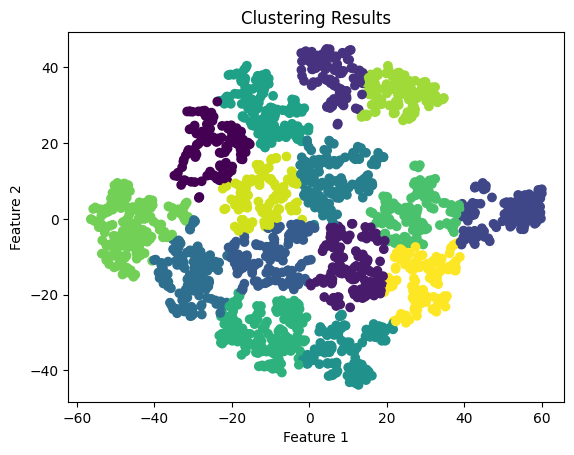

In [55]:
# Plot the clustering results
plt.scatter(reduced_data_tsne.iloc[:, 2], reduced_data_tsne.iloc[:, 3], c=cluster_labels_dbscan, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

In [56]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_data_tsne.iloc[:, -3:-1], cluster_labels_dbscan)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.4227035


In [57]:
# Calculate the Calinski-Harabasz index
ch_score_dbscan = calinski_harabasz_score(reduced_data_tsne.iloc[:, -3:-1], cluster_labels_dbscan)

print("Calinski-Harabasz Index:", ch_score_dbscan)

Calinski-Harabasz Index: 2578.46693631445


In [60]:
def evaluate_similarity(input_song_title, recommended_songs, data):
    # Get the features of the input song
    input_song_features = data[data['song_title'] == input_song_title].values[0, :10]
    
    # Iterate over recommended songs and calculate similarity scores
    similarity_scores = []
    for _, song in recommended_songs.iterrows():
        # Find the index of the recommended song in the data
        recommended_song_index = data[data['song_title'] == song['song_title']].index[0]
        
        # Get the features of the recommended song
        recommended_song_features = data.iloc[recommended_song_index].values[:10]
        
        # Calculate cosine similarity between input song and recommended song
        similarity_score = cosine_similarity([input_song_features], [recommended_song_features])[0][0]
        
        # Append the similarity score to the list
        similarity_scores.append(similarity_score)
    
    # Sort the recommended songs based on similarity scores in descending order
    sorted_indices = sorted(range(len(similarity_scores)), key=lambda k: similarity_scores[k], reverse=True)
    sorted_songs = recommended_songs.iloc[sorted_indices]
    
    # Print the similarity scores as percentages and recommended songs
    for i, (_, song) in enumerate(sorted_songs.iterrows()):
        similarity_score = similarity_scores[sorted_indices[i]]
        similarity_percentage = similarity_score * 100
        print(f"Similarity between '{input_song_title}' and '{song['song_title']}' - '{song['artist']}': {similarity_percentage:.2f}%")

In [75]:
evaluate_similarity(user_input,recommended_songs_kmeans,data)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [71]:
evaluate_similarity(user_input,recommended_songs_dbscan,data)

Similarity between 'Mask Off' and 'Water Me (feat. Leon Ware)' - 'Theophilus London': 85.03%
Similarity between 'Mask Off' and 'Hannah Montana' - 'Migos': 73.87%
Similarity between 'Mask Off' and 'My Sub (Pt. 2: The Jackin') - Album Version (Edited)' - 'Big K.R.I.T.': 73.38%
Similarity between 'Mask Off' and 'Alright' - 'Logic': 65.53%
Similarity between 'Mask Off' and 'I Want You - Single Version' - 'Marvin Gaye': 61.58%
Similarity between 'Mask Off' and 'They Come in Gold' - 'Shabazz Palaces': 58.79%
Similarity between 'Mask Off' and 'Frontier Psychiatrist' - 'The Avalanches': 57.08%
Similarity between 'Mask Off' and 'It's Not My Fault, I'm Happy' - 'Passion Pit': 49.85%
Similarity between 'Mask Off' and 'Hannah Hunt' - 'Vampire Weekend': 46.21%
Similarity between 'Mask Off' and 'Me Rehúso' - 'Danny Ocean': 31.54%
